# Introduction of scikit learn

## 0. An end to end workflow

What we're going to cover:

0. An end to end scikit learn workflow
1. Getting the data ready
2. Choose the righr estimators/algorithm for our problem
3. Fit the model/algorithm and use it to make predictions for our data
4. Evaluating a model
5. Improve a model
6. Save and load a training model
7. Putting it all together

In [18]:
#Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("data/10.3 heart-disease.csv.csv")

In [19]:
# Create X which is called features matrix
x = heart_disease.drop('target',axis =1)

# create y which is label matrix
y = heart_disease.target


In [20]:
#2. Choose the right model and hyper parameters
from sklearn.ensemble import  RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

#WE'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [21]:
# ways to solve warning  if we didn't put n_estimators = 100
#import warnings
# warnings.filterwarnings('ignore')


In [22]:
#3. Fit a model to training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2)

#it will train 80% of data and test 20% of data

In [23]:
clf.fit(x_train,y_train);

In [24]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3


In [25]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2


In [26]:
#make a prediction 
 y_label = clf.predict(np.array([0,2,3,4]))
    ## we cant predict it because it shape isn't same as x_label

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [27]:
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [28]:
y_test

119    1
192    0
284    0
273    0
27     1
85     1
262    0
237    0
202    0
200    0
227    0
258    0
238    0
271    0
77     1
231    0
39     1
46     1
12     1
277    0
280    0
72     1
136    1
88     1
263    0
84     1
188    0
81     1
73     1
109    1
      ..
161    1
249    0
204    0
140    1
66     1
269    0
57     1
94     1
240    0
153    1
150    1
201    0
128    1
254    0
246    0
168    0
90     1
29     1
143    1
281    0
221    0
123    1
173    0
189    0
288    0
23     1
7      1
217    0
147    1
251    0
Name: target, Length: 61, dtype: int64

### 4. Evaluate the model on training data and test data

In [29]:
clf.score(x_train,y_train)


1.0

In [30]:
clf.score(x_test,y_test)

0.8688524590163934

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86        31
           1       0.82      0.93      0.87        30

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [32]:
confusion_matrix(y_test,y_preds)

array([[25,  6],
       [ 2, 28]], dtype=int64)

In [33]:
accuracy_score(y_test,y_preds)

0.8688524590163934

###  5.Improve a model

In [34]:
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"try model with {i} estimators ..... ")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set : {clf.score(x_test, y_test)*100:.2f}%")
    print(" ")

try model with 10 estimators ..... 
Model accuracy on test set : 75.41%
 
try model with 20 estimators ..... 
Model accuracy on test set : 88.52%
 
try model with 30 estimators ..... 
Model accuracy on test set : 86.89%
 
try model with 40 estimators ..... 
Model accuracy on test set : 85.25%
 
try model with 50 estimators ..... 
Model accuracy on test set : 83.61%
 
try model with 60 estimators ..... 
Model accuracy on test set : 85.25%
 
try model with 70 estimators ..... 
Model accuracy on test set : 83.61%
 
try model with 80 estimators ..... 
Model accuracy on test set : 83.61%
 
try model with 90 estimators ..... 
Model accuracy on test set : 85.25%
 


### 6. Save a model and load it

In [35]:
import pickle
pickle.dump(clf,open("forest_model_1.pkl","wb"))

In [36]:
loaded_model = pickle.load(open("forest_model_1.pkl", 'rb'))
loaded_model.score(x_test, y_test)

0.8524590163934426

## Getting the data ready

In [37]:
import matplotlib.pyplot as plt

In c:\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


### 1. Getting a data ready to be used with machine learning
Three main thigs we have to do :
    1. Split the data into labels and features(usually 'X' and 'y')
    2. Filling also called inputing missing values
    3. Converting non numerical values to numerical values also featuring coding
    

In [38]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
x = heart_disease.drop('target',axis = 1)

In [40]:
y = heart_disease.target

In [41]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [43]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [44]:
car_sales = pd.read_csv('data/7.1 car-sales.csv.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [45]:
#split into x,y
x= car_sales.drop('Price',axis = 1)
y = car_sales['Price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [46]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

c:\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Honda'

In [47]:
# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ['Make','Colour','Doors']
  = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                 one_hot,
                                categorical_feature)],
                                remainder = 'passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.13095e+05],
       [0.00000e+00, 0.00000e+

In [48]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [49]:
#Another way to change data to numeric values

dummies = pd.get_dummies(car_sales[['Make',"Colour",'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,0,0,1,0,0,0,0,1
1,4,0,1,0,0,0,0,0,1,0
2,3,0,0,0,1,0,1,0,0,0
3,5,1,0,0,0,1,0,0,0,0
4,4,0,0,1,0,0,0,0,0,1
5,4,0,0,0,1,0,0,1,0,0
6,4,0,1,0,0,0,1,0,0,0
7,4,0,1,0,0,0,1,0,0,0
8,4,0,0,0,1,0,0,0,0,1
9,4,0,0,1,0,0,0,0,0,1


In [50]:
#Change the price column to float

car_sales['Price'] = car_sales.Price.str.replace('[\$\,]','')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.00
1,Honda,Red,87899,4,5000.00
2,Toyota,Blue,32549,3,7000.00
3,BMW,Black,11179,5,22000.00
4,Nissan,White,213095,4,3500.00
5,Toyota,Green,99213,4,4500.00
6,Honda,Blue,45698,4,7500.00
7,Honda,Blue,54738,4,7000.00
8,Toyota,White,60000,4,6250.00
9,Nissan,White,31600,4,9700.00


In [51]:
# LEt's Refit the model
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size = 0.20)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
model.score(x_test,y_test)
#due to very less data

-0.2596480000000001

In [53]:
car_sales.to_csv('car_sales1.csv',index = False)

In [54]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.00
1,Honda,Red,87899,4,5000.00
2,Toyota,Blue,32549,3,7000.00
3,BMW,Black,11179,5,22000.00
4,Nissan,White,213095,4,3500.00
5,Toyota,Green,99213,4,4500.00
6,Honda,Blue,45698,4,7500.00
7,Honda,Blue,54738,4,7000.00
8,Toyota,White,60000,4,6250.00
9,Nissan,White,31600,4,9700.00


# . Predicting the data for a different file

In [55]:
car_data = pd.read_csv('data/auto_mpg_weka_dataset.csv')

In [56]:
car_data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [57]:
car_data.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64

In [58]:
car_data.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
mpg             float64
dtype: object

In [59]:
#If there are missing values
x = car_data.drop('mpg',axis =1)
y = car_data.mpg

In [60]:
# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ['car_name']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                 one_hot,
                                categorical_feature)],
                                remainder = 'passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x

<398x312 sparse matrix of type '<class 'numpy.float64'>'
	with 3184 stored elements in Compressed Sparse Row format>

In [61]:
model = RandomForestRegressor()

In [62]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size = 0.2)
model.fit(x_train,y_train)

c:\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [63]:
model.score(x_test,y_test)

0.9161036199274385

###  If there are missing values
1. Fill them with some values imputation
2. Remove the samples with missing values

In [64]:
car_sales_missing = pd.read_csv('data/car_sales_missing.csv')

In [65]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043.0,4.0,NaN
1,Honda,Red,NaN,4.0,5000.0
2,Toyota,NaN,32549.0,3.0,7000.0
3,BMW,Black,11179.0,NaN,22000.0
4,NaN,White,213095.0,4.0,3500.0
5,Toyota,Green,99213.0,4.0,NaN
6,Honda,NaN,45698.0,4.0,7500.0
7,Honda,Blue,54738.0,NaN,7000.0
8,NaN,White,60000.0,4.0,6250.0
9,Nissan,White,31600.0,NaN,NaN



#### fill missing data with pandas

In [66]:
#Fill the make column
car_sales_missing['Make'].fillna('missing', inplace  = True)

#fill the color column
car_sales_missing.Colour.fillna('missing',inplace = True)

#fill the odometer column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace  = True)

#fill the doors column
car_sales_missing.Doors.fillna(4, inplace  = True)

In [67]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            3
dtype: int64

In [68]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace  = True)

In [69]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
1,Honda,Red,77568.333333,4.0,5000.0
2,Toyota,missing,32549.000000,3.0,7000.0
3,BMW,Black,11179.000000,4.0,22000.0
4,missing,White,213095.000000,4.0,3500.0
6,Honda,missing,45698.000000,4.0,7500.0
7,Honda,Blue,54738.000000,4.0,7000.0
8,missing,White,60000.000000,4.0,6250.0


In [70]:
x = car_sales_missing.drop('Price',axis  =1)
y = car_sales_missing.Price

In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                 one_hot,
                                categorical_feature)],
                                remainder = 'passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x


array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 7.75683333e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.25490000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.11790000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.13095000e+05],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00

### Fill the values with scikit learn

In [72]:
car_sales_missing = pd.read_csv('data/car_sales_missing.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043.0,4.0,NaN
1,Honda,Red,NaN,4.0,5000.0
2,Toyota,NaN,32549.0,3.0,7000.0
3,BMW,Black,11179.0,NaN,22000.0
4,NaN,White,213095.0,4.0,3500.0
5,Toyota,Green,99213.0,4.0,NaN
6,Honda,NaN,45698.0,4.0,7500.0
7,Honda,Blue,54738.0,NaN,7000.0
8,NaN,White,60000.0,4.0,6250.0
9,Nissan,White,31600.0,NaN,NaN


In [73]:
car_sales_missing.dropna(subset = ['Price'], inplace = True)
car_sales_missing.isna().sum()

Make             2
Colour           2
Odometer (KM)    1
Doors            2
Price            0
dtype: int64

In [74]:
#split into x and y
x = car_sales_missing.drop('Price',axis = 1)
y = car_sales_missing.Price

In [75]:
#fill the missing values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill the categorical values with missing and numerical values with mean
cat_imputer  = SimpleImputer(strategy='constant', fill_value = 'missing')
door_imputer = SimpleImputer(strategy='constant', fill_value = 4)
num_imputer = SimpleImputer(strategy='mean')

#Define Columns
cat_features = ['Make','Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

#Create  an Imputer  (something that fills missing data)
imputer  = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
     ('num_features', num_imputer, num_features)
])
    
#Transform the data
filled_x = imputer.fit_transform(x)
filled_x

    


array([['Honda', 'Red', 4.0, 69543.16666666667],
       ['Toyota', 'missing', 3.0, 32549.0],
       ['BMW', 'Black', 4.0, 11179.0],
       ['missing', 'White', 4.0, 213095.0],
       ['Honda', 'missing', 4.0, 45698.0],
       ['Honda', 'Blue', 4.0, 54738.0],
       ['missing', 'White', 4.0, 60000.0]], dtype=object)

In [76]:
cars_sales_filled = pd.DataFrame(filled_x, columns = ['Make','Colour','Doors', 'Odometer (KM)'])
cars_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,Red,4,69543.2
1,Toyota,missing,3,32549
2,BMW,Black,4,11179
3,missing,White,4,213095
4,Honda,missing,4,45698
5,Honda,Blue,4,54738
6,missing,White,4,60000


In [77]:
x = cars_sales_filled

In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                 one_hot,
                                categorical_feature)],
                                remainder = 'passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0,
        69543.16666666667],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 32549.0],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11179.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 213095.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 45698.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 54738.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 60000.0]],
      dtype=object)

In [79]:
y

1     5000.0
2     7000.0
3    22000.0
4     3500.0
6     7500.0
7     7000.0
8     6250.0
Name: Price, dtype: float64

In [80]:
# Now we have got our data as numbers and filled 
# lets fit a model
np.random.seed(65)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,y, test_size = 0.2)


model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

-0.35575211833455067

#### Answer is very bad because of small data

## 2. Choosing the right estimator/algorithm for our problem
scikit -Learn use an estimator for our machine learning model or algorithm

Classification - Predicting a sample is one thing or another

Regression - Predicting a number


Check the scikit learn machine learning map
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Picking a machine learning model for a regression problem

In [81]:
#import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [82]:
boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [83]:
len(boston_df)

506

### Let's try the Ridge  Regression model

In [84]:
from sklearn.linear_model import Ridge
np.random.seed(42)

#create the data
x = boston_df.drop('target', axis  =1)
y = boston_df.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

#instantiate the ridge model
model = Ridge()
model.fit(x_train, y_train)

#check the score of the ridge model
model.score(x_test, y_test)

0.6662221670168522

How to improve this score 

What if ridge wasn't working?

### let's try the random forest


In [85]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(69)

#Create the data
x = boston_df.drop('target', axis =1)
y = boston_df.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size  = 0.2)

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train, y_train)

rf.score(x_test, y_test)

0.8573996489830262

## Choosing a estimator for classification problem

In [86]:
heart_disease = pd.read_csv('data/10.3 heart-disease.csv.csv')

### Linear SVC

In [87]:
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

x = heart_disease.drop('target',axis =1)
y = heart_disease.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

clf = LinearSVC(max_iter = 1000)
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

c:\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4918032786885246

In [88]:
heart_disease.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [89]:
from sklearn.ensemble  import RandomForestClassifier

#setup random seed
np.random.seed(42)

x = heart_disease.drop('target',axis =1)
y = heart_disease.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.8524590163934426

Tidbit :
    
    1. If you have structured data, use ensemble methods 
    2. If you have unstructured data, use deep learning or transfer learning

In [90]:
heart_disease.head()  #structure data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3. Fit the model/algorithm on our data anduse it to make ouur predictions

### 3.1 Fitting the model to our data

 * `x` = feature, feature variables, data
 * `y` = labels, target, target variables

In [91]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

x = heart_disease.drop('target',axis =1)
y = heart_disease.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

clf = RandomForestClassifier(n_estimators = 100)

#Fit the model to our data (training machine learning model)
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.8524590163934426

In [92]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### 3.2 Make some predictions using machine  learning model

2 ways to make predictions: 
  1. `predict()`
  2. `predict_proba()`

In [93]:
# use a trained model to make predictions

clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [94]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [95]:
# Compare predictions to true labels to evaluate a model
y_preds  = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [97]:
#predict_proba() returns probabilities of a classification model
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [98]:
#Let's predict on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [99]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop('target', axis  = 1)

y = boston_df.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
model =  RandomForestRegressor(n_estimators = 100).fit(x_train, y_train)


#Make predictions 

y_preds = model.predict(x_test)

In [100]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [101]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [102]:
# Comparre the predictions to the true
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

2.1226372549019623

## 4. Evaluating a machine learning model

Three ways to evaluate scikit learn models:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with `score` method

In [103]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis = 1 )
y = heart_disease.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
clf.score(x_train, y_train), clf.score(x_test, y_test)

(1.0, 0.8524590163934426)

In [105]:
#lets do it for Regression  odel

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop('target', axis  = 1)

y = boston_df.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
model =  RandomForestRegressor(n_estimators = 100).fit(x_train, y_train)


#Make predictions 

y_preds = model.predict(x_test)

In [106]:
model.score(x_test, y_test)

0.873969014117403

### 4.2 Evaluating a model using a `scoring` parameter

In [107]:
 from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis = 1 )
y = heart_disease.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [108]:
clf.score(x_test, y_test)

0.8524590163934426

In [109]:
cross_val_score(clf,x,y, cv = 10)

#It create the 10 different sample of x test and train from data

array([0.90322581, 0.80645161, 0.87096774, 0.87096774, 0.87096774,
       0.8       , 0.76666667, 0.86666667, 0.72413793, 0.82758621])

In [110]:
np.random.seed(69)


#Single training and test split score
clf_single_score = clf.score(x_test, y_test)

#take the mean of 5 fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y, cv = 5))

#compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8249180327868852)

In [111]:
#Default scoring parameter of classifier = mean accuracy
clf.score

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [112]:
# Scoring parameter set to none by default
cross_val_score(clf , x, y, cv = 5, scoring = None)

array([0.83606557, 0.86885246, 0.80327869, 0.85      , 0.78333333])

### 4.2.1 Classifications model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classififcation report 


#### Accuracy

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis = 1)
y = heart_disease.target

clf = RandomForestClassifier(n_estimators = 100)
cross_val_score = cross_val_score(clf, x, y, cv = 5)


In [114]:
np.mean(cross_val_score)

0.8248087431693989

#### Area under Reciever Operating Characteristic curve (AUC/ROC)

ROC curves arre a comparison of a model true positive rate(tpr) versus a model false posotive rate(fpr)

* true positive = model predict 1 when truth is 1
* false positive = model predict 1 when truth is 0
* true negative = model predict 0 when truth is 0
* false negative = model predict 0 when truth is 1

In [115]:
from sklearn.metrics import roc_curve

#Make predictions with probabilities
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
clf.fit(x_train, y_train)
y_probs = clf.predict_proba(x_test)
    
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [116]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]


array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [117]:
#calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#Check the fpr
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [118]:
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


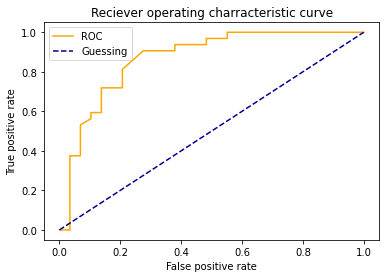

In [119]:
# Create a function for plotting roc
import matplotlib.pyplot as plt

def plot_curve(fpr, tpr):
    """
    
    PLots a re ROC curve given the fpr and tpr of a model
    """
    #plot curve
    plt.plot(fpr,tpr,color = 'orange', label = 'ROC')
    #plot line with no predictive power(baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle= '--', label = 'Guessing')
             
    #Customize plot
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Reciever operating charracteristic curve')
    plt.legend()
    plt.show()
    
plot_curve(fpr,tpr)

In [120]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

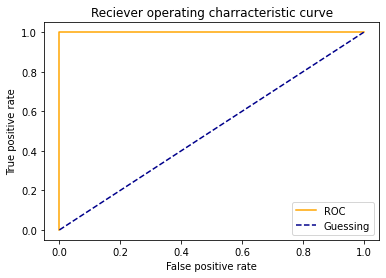

In [121]:
#plot perfect roc curve
fpr, tpr, thresholds= roc_curve(y_test, y_test)
plot_curve(fpr, tpr)

In [122]:
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels the model predicts annd the actual label it was supposed to predict

In essence, giving you an idea where the model gets confused

In [123]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [124]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames= ['Actual Labels'],
           colnames= ['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


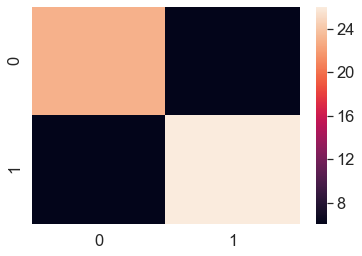

In [125]:
# Make our confusion matrix with seaborn's heatmap()
import seaborn as sns

#set the font scale 
sns.set(font_scale = 1.5)

#create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#plot it using seaborn 
sns.heatmap(conf_mat)

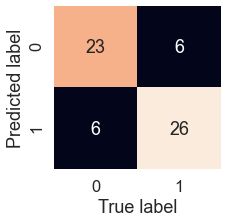

In [126]:
def plot_confmat(conf_mat):
    """
    Plots confusion matrix using seaborn heatmap
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat, 
                    annot = True, # Annotate te boxes with conf_mat info
                    cbar = False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')

    
plot_confmat(conf_mat)

**Classification Report**

In [127]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

   micro avg       0.80      0.80      0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [128]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #Only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict = True))

c:\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,0.0,1.0,micro avg,macro avg,weighted avg
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
support,9999.00000,1.0,10000.0000,10000.000000,10000.00000


## 4.2.2 Regression model evaluation matrix

1. R^2 or coefficient of determination
2. Mean absolute error
3. Mean squared error

**R^2**

compares your model predictions to the mean of the target, Value  of R^2 can range from minus infinity to 1. For example if a model predict the mean of target it's  R^2 value will be 0. And if your model predict a range of number, it's R^2 value is 1

In [129]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop('target', axis =1)
y = boston_df.target


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train, y_train);


In [130]:
model.score(x_test, y_test)

0.873969014117403

In [131]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [132]:
r2_score(y_test, y_test_mean)

0.0

**Mean Absolute Error**

It is the average of the absolute differences between predictions and actual values. It gives you an idead of how wrong your model predictions are

In [133]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [134]:
df = pd.DataFrame(data = {'actual value' : y_test,
                         'predicted_values' : y_preds})
df['differences'] = df['predicted_values'] - df['actual value']
df.head()

,actual value,predicted_values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753


**Mean Squared Error**

In [135]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

In [136]:
# Calculate mse by ourselves
squared = np.square(df.differences)
squared.mean()

9.242328990196082

## Finally using the `scoring` parameter

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x= heart_disease.drop('target', axis = 1)
y = heart_disease.target

clf = RandomForestClassifier(n_estimators = 100)


In [138]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, cv =5, scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [139]:
#Cross validated accuracy
print(f'the cross validated accuracy is : {np.mean(cv_acc)*100:.2f}%')

the cross validated accuracy is : 82.48%


In [140]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, cv =5, scoring = 'accuracy')
print(f'the cross validated accuracy is : {np.mean(cv_acc)*100:.2f}%')

the cross validated accuracy is : 82.48%


In [141]:
#precision
cv_precision = cross_val_score(clf, x, y, cv = 5, scoring = 'precision')
np.mean(cv_precision)

0.8085601538512754

In [142]:
#Recall
cv_recall = cross_val_score(clf, x,y, cv= 5, scoring = 'recall')
np.mean(cv_recall)

0.8424242424242424

In [143]:
#f1
cv_f1 = cross_val_score(clf, x, y, cv = 5, scoring = 'f1')
np.mean(cv_f1)

0.841476533416832

### Regression model

In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop('target', axis =1)
y = boston_df.target

model = RandomForestRegressor(n_estimators = 100)

In [145]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv = 5, scoring = None)
cv_r2
np.mean(cv_r2)

0.622375083951403

In [146]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv = 5, scoring = 'r2')
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [147]:
cv_mae = cross_val_score(model, x, y,cv = 5, scoring = 'neg_mean_absolute_error')
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [148]:
# Mean Squared Error
cv_mse = cross_val_score(model, x, y, cv = 5, scoring = 'neg_mean_squared_error')
cv_mse

array([ -7.77433365, -12.76515461, -19.26965413, -46.20221782,
       -19.10133112])

In [149]:
np.mean(cv_mse)

-21.02253826604542

### 4.3 Using different Evaluation matrix as scikit learn functions

**Classification Evaluation Functions**

In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split

np.random.seed(42)

x = heart_disease.drop('target', axis = 1)
y = heart_disease.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)

# Make some predictions
y_preds = clf.predict(x_test)

#Evaluate the classifier
print('Classifier matrix on the test set')
print(f'Accuracy : {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision : {precision_score(y_test, y_preds)*100:.2f}%')
print(f'Recall : {recall_score(y_test, y_preds)*100:.2f}%')
print(f'f1 : {f1_score(y_test, y_preds)*100:.2f}%')

Classifier matrix on the test set
Accuracy : 85.25%
Precision : 84.85%
Recall : 87.50%
f1 : 86.15%


**Regression Evaluation functions**

In [157]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = boston_df.drop('target', axis = 1)
y = boston_df.target

x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.2)

clf  = RandomForestRegressor(n_estimators = 100)
clf.fit(x_train, y_train)

#Make prediction using regression model
y_preds = clf.predict(x_test)

#Evaluate your model
print('Regression model matrix on the test set')
print(f'R^2 score : {r2_score(y_test, y_preds)}')
print(f'MAE : {mean_absolute_error(y_test, y_preds)}')
print(f'MSE : {mean_squared_error(y_test, y_preds)}')


Regression model matrix on the test set
R^2 score : 0.8238769438502933
MAE : 2.8664950495049513
MSE : 15.300409381188123


# 5. Improving our model
 
First predictions = Baseline predictions.
First Model = Baseline Model.

From a data perspective:
* Could we collect more data?
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyper parameters vs Parameters
* Parameters = Models find these patterns in the data
* Hyper Parameter = Setting in the model to potentially improve the ability to find patterns.

Three ways to adjust hyperparameters : 
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV


In [158]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [161]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

###  5.1 Tuning hyperparameters by hand

Let's make 3  sets training, validation, test set

We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_sammples_split`
* `n_estimators`

In [167]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels On a classification model. 
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy, 2),
                  'precision': round(precision, 2),
                  'recall' : round(recall, 2),
                  'f1' : round(f1, 2)}
    print(f'Acc: {accuracy * 100:.2f}%')
    print(f'precision: {precision:.2f}')
    print(f'recall: {recall:.2f}')
    print(f'F1 score : {f1:.2f}')
    
    return metric_dict

In [168]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac = 1)

#split into x and y 
x  = heart_disease_shuffled.drop('target', axis =1 )
y = heart_disease_shuffled.target


#Split the data into train, validation and test set
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of the data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) #15% of data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

len(x_train), len(x_valid), len(x_test)


(212, 45, 46)

In [169]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

#Make baseline predictions 
y_preds = clf.predict(x_valid)

#Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 80.00%
precision: 0.77
recall: 0.92
F1 score : 0.84


c:\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [171]:
np.random.seed(42)

#Create a second classifier with different hyperparameters

clf2 = RandomForestClassifier(n_estimators= 100)
clf2.fit(x_train, y_train)

#Make Predictions 
y_preds2 = clf2.predict(x_valid)

#Evaluate the second classifier
clf2_metrics = evaluate_preds(y_valid, y_preds2)

Acc: 82.22%
precision: 0.84
recall: 0.84
F1 score : 0.84


In [172]:
clf3 = RandomForestClassifier(n_estimators=100, 
                             max_depth=10)
clf3.fit(x_train, y_train)

#Make prediction
y_preds3 = clf3.predict(x_valid)

#Evaluate the second classifier
clf3_metrics= evaluate_preds(y_valid, y_preds3)

Acc: 82.22%
precision: 0.81
recall: 0.88
F1 score : 0.85


### 5.2 Hyperparamter tuning with RandomizedSearchCV

In [180]:
from sklearn.model_selection import RandomizedSearchCV

grid  = {'n_estimators' : [10,100,200,500,1000,1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
         'min_samples_split' : [2, 4, 6],
         'min_samples_leaf' : [1, 2, 4]}

np.random.seed(42)

#Split into x & y
x = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled.target

#Split into train and test set
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# InstantiateRandomForestClassifier
clf = RandomForestClassifier(n_jobs =1)

#Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions=grid,
                            n_iter  =10, #number of model to try
                            cv =5, 
                            verbose = 20)

#Fit the randomizedSearchCv version to clf
rs_clf.fit(x_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=0.7959183673469388, total=   0.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=0.8163265306122449, total=   0.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=0.75, total=   0.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=0.875, total=   0.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=0.875, total=   0.7s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, score=0.7551020408163265, total=   0.0s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, score=0.8163265306122449, total=   0.0s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.5s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, score=0.7291666666666666, total=   0.0s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, score=0.8958333333333334, total=   0.0s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, score=0.875, total=   0.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.7s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=0.7755102040816326, total=   0.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=0.7959183673469388, total=   0.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.1s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=0.75, total=   0.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=0.875, total=   0.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    5.4s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=0.875, total=   0.0s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20, score=0.7959183673469388, total=   0.0s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20, score=0.8367346938775511, total=   0.0s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    5.7s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20, score=0.7291666666666666, total=   0.0s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20, score=0.875, total=   0.0s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20, score=0.8541666666666666, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.7346938775510204, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sq

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    5.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    5.9s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.6875, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.7708333333333334, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.7916666666666666, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, score=0.7755102040816326, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=auto, ma

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   13.6s finished


In [181]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [183]:
# Make Predictions withh the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 81.97%
precision: 0.77
recall: 0.86
F1 score : 0.81


### 5.3Hyperparameter tuning with GridSearchCV

In [185]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [186]:
grid_2 = {'n_estimators': [ 100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [187]:
from sklearn.model_selection import GridSearchCV 


np.random.seed(42)

#Split into x & y
x = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled.target

#Split into train and test set
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# InstantiateRandomForestClassifier
clf = RandomForestClassifier(n_jobs =1)

#Setup GridRandomizedSearchCV
gs_clf = GridSearchCV(estimator = clf,
                            param_grid=grid_2,
                            cv =5, 
                            verbose = 20)

#Fit the randomizedSearchCv version to clf
gs_clf.fit(x_train, y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.7551020408163265, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.7959183673469388, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.8125, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.875, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, score=0.875, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, score=0.8163265306122449, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, score=0.8367346938775511, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, score=0.7291666666666666, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, score=0.8333333333333334, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, score=0.875, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, score=0.7755102040816326, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.5s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, score=0.8367346938775511, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, score=0.75, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, score=0.875, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.7s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, score=0.875, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, score=0.7755102040816326, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, score=0.8163265306122449, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, score=0.7708333333333334, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, score=0.875, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, score=0.875, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.4s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, score=0.8367346938775511, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, score=0.7959183673469388, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, score=0.7291666666666666, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, score=0.875, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500, score=0.7959183673469388, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500, score=0.8163265306122449, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500, score=0.7708333333333334, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500, score=0.8958333333333334, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   12.3s finished


In [188]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [191]:
gs_y_preds = gs_clf.predict(x_test)

#evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
precision: 0.74
recall: 0.82
F1 score : 0.78


Let's compare our different model metrics

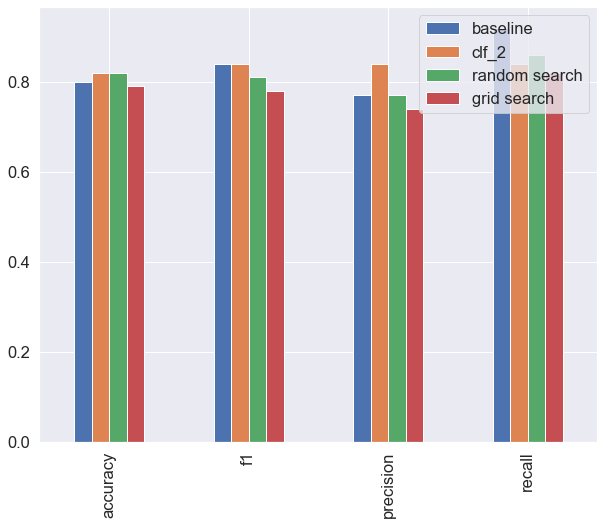

In [215]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                               'clf_2' : clf2_metrics,
                               'random search' : rs_metrics,
                               'grid search' : gs_metrics})

compare_metrics.plot.bar(figsize  = (10,8))

## 6. Save and load a trained model
Two ways to save and load machine learning model

1. With python's pickle module
2. With the joblib module


Pickle

In [216]:
import pickle

#Save an existing model to file
pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl','wb'))

In [217]:
loaded_model = pickle.load(open('gs_random_forest_model_1.pkl', 'rb'))

In [218]:
# Make some predictions
pickle_y_preds = loaded_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
precision: 0.74
recall: 0.82
F1 score : 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib** #use this instead of pickle

In [225]:
from joblib import dump, load


#save the data
dump(gs_clf, filename = 'gs_clf.joblib')

['gs_clf.joblib']

In [226]:
#Import  a model
loaded_model = load(filename  = 'gs_clf.joblib')

In [227]:
#Make predictons
job_y_preds = loaded_model.predict(x_test)
evaluate_preds(y_test, job_y_preds)

Acc: 78.69%
precision: 0.74
recall: 0.82
F1 score : 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7.Putting it all together

In [233]:
data = pd.read_csv('data/car_sales_missing.csv')


In [234]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043.0,4.0,NaN
1,Honda,Red,NaN,4.0,5000.0
2,Toyota,NaN,32549.0,3.0,7000.0
3,BMW,Black,11179.0,NaN,22000.0
4,NaN,White,213095.0,4.0,3500.0
5,Toyota,Green,99213.0,4.0,NaN
6,Honda,NaN,45698.0,4.0,7500.0
7,Honda,Blue,54738.0,NaN,7000.0
8,NaN,White,60000.0,4.0,6250.0
9,Nissan,White,31600.0,NaN,NaN


Steps we want to do (All in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model to data

In [241]:
data

,Make,Colour,Odometer (KM),Doors,Price
1,Honda,Red,NaN,4.0,5000.0
2,Toyota,NaN,32549.0,3.0,7000.0
3,BMW,Black,11179.0,NaN,22000.0
4,NaN,White,213095.0,4.0,3500.0
6,Honda,NaN,45698.0,4.0,7500.0
7,Honda,Blue,54738.0,NaN,7000.0
8,NaN,White,60000.0,4.0,6250.0


In [249]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(42)

#Import data 
data = pd.read_csv('data/car_sales_missing.csv')
data.dropna(subset = ['Price'], inplace = True)

# Define different features and transformer pipeline
categorical_feature = ['Make', 'Colour']
categorical_transformer = Pipeline(steps = [
                     ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
                      ('one_hot', OneHotEncoder(handle_unknown = 'ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 4))
])


numerical_features = ['Odometer (KM)']
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'mean'))
])

# Setup preprocessing steps (fill missing values then convert to numbers)
preprocesser = ColumnTransformer(
                      transformers= [
                          ('cat', categorical_transformer, categorical_feature),
                          ('door', door_transformer, door_feature),
                          ('num', numerical_transformer, numerical_features)
                      ])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps = [('preprocessor',preprocesser),
                         ('model',RandomForestRegressor())])

#Split data
x = data.drop('Price',axis = 1)
y = data.Price
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

#Fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

c:\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-6.150625

it's also possible to use `GridSearchCV` or `RandomizedSearchCV` with pipeline

In [250]:
# Use GridSearchCV with our Regression pipeline


pipe_grid = {
    'preprocessor__num__imputer__strategy' : ['mean', 'median'],
    'model__n_estimators': [100, 100],
    'model__max_depth' : [None, 5],
    'model__max_features' : ['auto'],
    'model__min_samples_split' : [2,4]
}


gs_model = GridSearchCV(model, pipe_grid ,cv = 5, verbose =2)
gs_model.fit(x_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.0s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_sp

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    5.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value='missing', missing_values=nan,
       strategy='constant'...ators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'preprocessor__num__imputer__strategy': ['mean', 'median'], 'model__n_estimators': [100, 100], 'model__max_depth': [None, 5], 'model__max_features': ['auto'], 'model__min_samples_split': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [251]:
gs_model.score(x_test, y_test)

-3.24328125